# ROC

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Iris datasets

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
import numpy
ypred = clf.predict(X_test)
yprob = clf.predict_proba(X_test)
score = numpy.array(list(yprob[i,ypred[i]] for i in range(len(ypred))))

In [ ]:
data = numpy.zeros((len(ypred), 2))
data[:,0] = score.ravel()
data[ypred==y_test,1] = 1
data[:5]

array([[ 0.609307  ,  0.        ],
       [ 0.54098431,  0.        ],
       [ 0.85233654,  1.        ],
       [ 0.41974474,  0.        ],
       [ 0.42781609,  0.        ]])

## ROC - TPR / FPR

* TPR = True Positive Rate
* FPR = False Positive Rate

You can see as TPR the distribution function of a score for a positive example and the FPR the same for a negative example.

In [ ]:
from mlstatpy.ml.roc import ROC

In [ ]:
roc = ROC(df=data)

In [ ]:
roc

Overall precision: 0.61 - AUC=0.921902
--------------
      score  label  weight
0  0.397318    0.0     1.0
1  0.397318    0.0     1.0
2  0.405116    0.0     1.0
3  0.419745    0.0     1.0
4  0.427816    0.0     1.0
--------------
       score  label  weight
45  0.783268    1.0     1.0
46  0.812486    1.0     1.0
47  0.846968    1.0     1.0
48  0.846968    1.0     1.0
49  0.852337    1.0     1.0
--------------
    False Positive Rate  True Positive Rate  thresholds
0              0.000000            0.032258    0.852337
1              0.000000            0.193548    0.749667
2              0.000000            0.354839    0.711788
3              0.000000            0.516129    0.664266
4              0.052632            0.645161    0.623393
5              0.157895            0.741935    0.603010
6              0.210526            0.870968    0.574672
7              0.315789            0.967742    0.559276
8              0.578947            0.967742    0.529478
9              0.789474   

In [ ]:
roc.auc()

0.92190152801358238

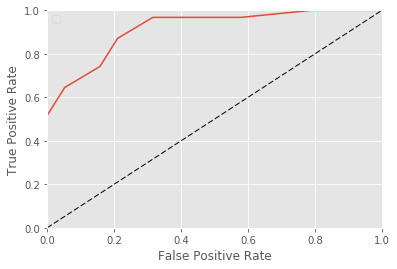

In [ ]:
roc.plot(nb=10)

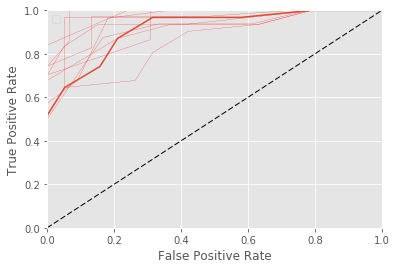

In [ ]:
roc.plot(nb=10, bootstrap=10)

## ROC - score distribution

This another representation for the metrics FPR and TPR. $P(x<s)$ is the probability that a score for a positive example to be less than $s$. $P(->s)$ is the probability that a score for a negative example to be higher than $s$. We assume in this case that the higher the better for the score.

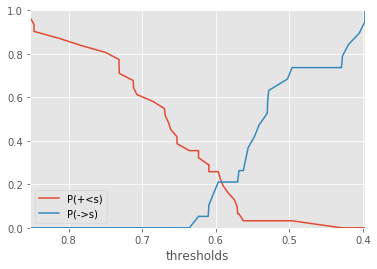

In [ ]:
roc.plot(curve=ROC.CurveType.PROBSCORE, thresholds=True)

## ROC - recall / precision

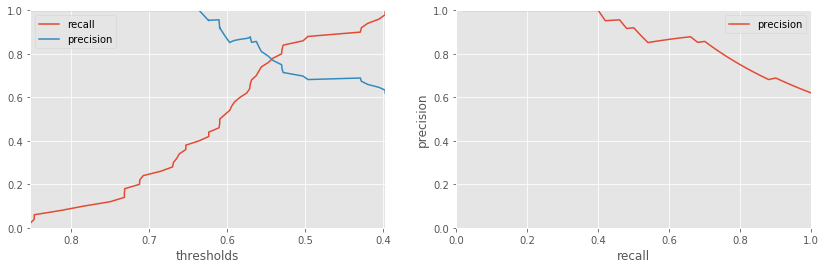

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14,4))
roc.plot(curve=ROC.CurveType.RECPREC, thresholds=True, ax=axes[0])
roc.plot(curve=ROC.CurveType.RECPREC, ax=axes[1])